In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [15]:
X, y = mnist["data"], mnist.target

In [16]:
some_digit = X[36000]

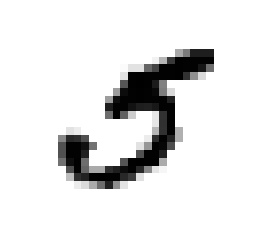

In [21]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

#### Split data

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(56000, 784) (56000,) (14000, 784) (14000,)


#### Performance Measures
1. base estimators in case of skewed data
precision/recall tradeoff

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [25]:
y_train_5 = (y_train == 5)

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[50228,   721],
       [ 1553,  3498]])

In [34]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

0.75469255663430423

In [35]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(
    y_train_5, y_scores)

(0, 1)

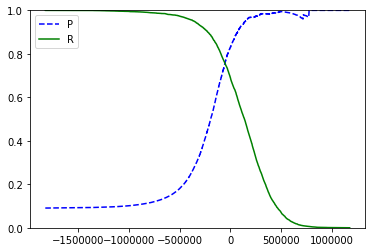

In [38]:
plt.plot(thresholds, precisions[:-1], 'b--', label='P')
plt.plot(thresholds, recalls[:-1], 'g-', label='R')
plt.legend(loc='upper left')
plt.ylim([0,1])

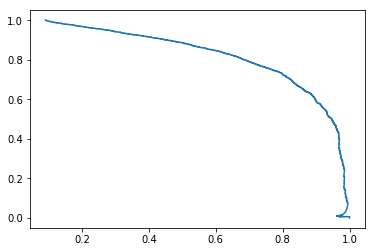

In [40]:
plt.plot(precisions[:-1], recalls[:-1])

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

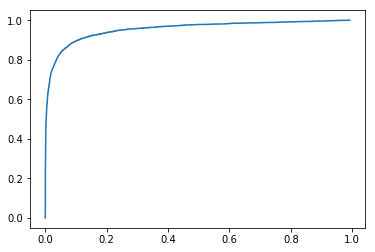

In [42]:
plt.plot(fpr[:-1], tpr[:-1])

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95510068630126377

#### Multiclass Classification
1. OvR vs OvO

In [44]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [46]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [47]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [48]:
import numpy as np

In [49]:
np.argmax(some_digit_scores)

5

In [51]:
sgd_clf.classes_[5]

5.0

#### 2. Error Anaylze

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


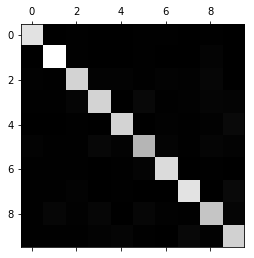

In [58]:
from sklearn.preprocessing import StandardScaler
X_train_scale = StandardScaler().fit_transform(X_train)
y_train_pred = cross_val_predict(sgd_clf, X_train_scale, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [87]:
row_sums = conf_mx.sum(axis=1, keepdims=True, dtype=float)
norm_conf_mx = conf_mx / row_sums

In [89]:
print conf_mx

[[5353    2   24   11    8   35   44    9   32    4]
 [   1 6058   42   20    6   39    9    8  107   12]
 [  50   34 5001   91   84   26   75   66  149   16]
 [  37   41  128 4994    1  208   34   52  123   95]
 [  15   21   40    5 4998    8   51   30   69  222]
 [  73   47   30  178   73 4301   98   27  141   83]
 [  30   24   45    3   42  105 5206    9   37    0]
 [  27   26   71   22   47   11    7 5389   13  221]
 [  47  148   69  147   17  144   54   30 4673  131]
 [  38   26   24   87  137   34    0  191   70 4959]]


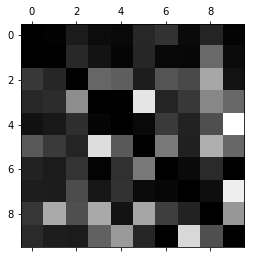

In [90]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### Multil-label classifier
Remove noise from images: Use knn-classification

### exercise